In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv")

air_quality = air_quality.rename(columns={"date.utc": "datetime"})

air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [3]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [4]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [5]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

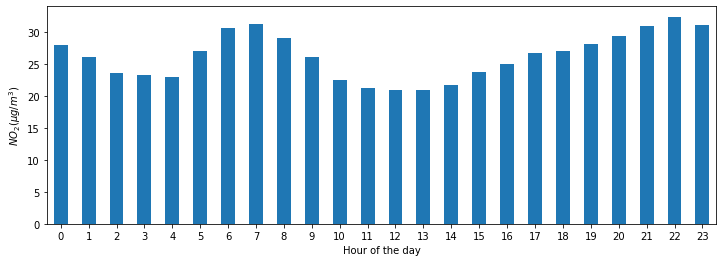

In [7]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)


plt.xlabel("Hour of the day");  # custom x label using matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");